<a href="https://colab.research.google.com/github/Sumitkevlani/End-to-End-ML-projects/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Uploading and Preprocessing the dataset**

In [51]:
loan_dataset = pd.read_csv('loan_status.csv')

In [52]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
loan_dataset.shape

(614, 13)

In [54]:
rows_with_na_value = loan_dataset.isna().any(axis=1).sum()
print('Count of rows with at least one NA value: ',rows_with_na_value)

Count of rows with at least one NA value:  134


In [55]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
loan_dataset = loan_dataset.dropna()

In [57]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
loan_dataset = loan_dataset.replace({"Loan_Status":{'Y':1,'N':0}})
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [59]:
loan_status_counts = loan_dataset['Loan_Status'].value_counts()
loan_status_counts

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [60]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [61]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [62]:
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [63]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<Axes: xlabel='Education', ylabel='count'>

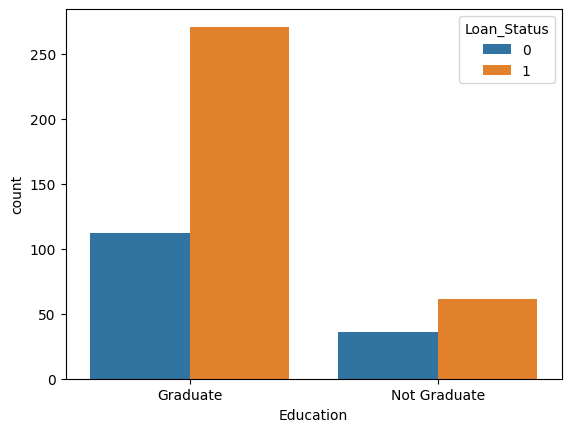

In [64]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

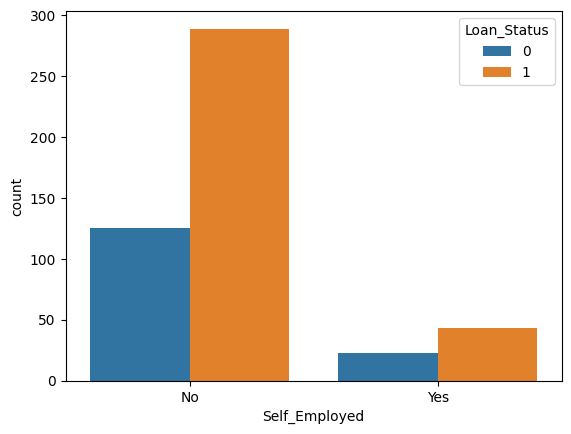

In [65]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

In [66]:
loan_dataset = loan_dataset.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Self_Employed':{'No':0,'Yes':1}})

In [67]:
print(loan_dataset)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [74]:
scaler = StandardScaler()

X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
X = scaler.fit_transform(X)
Y = loan_dataset['Loan_Status']
print(X)
print(Y)

[[ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.34825769]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
  -0.13178459]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
  -0.13178459]
 ...
 [ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -0.13178459]
 [ 0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
  -0.13178459]
 [-2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
   1.08468851]]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(432, 11) (432,) (48, 11) (48,)


**Training the Model using Support Vector Machine**

In [76]:
model = SVC()
model.fit(X_train,Y_train)

SVC()

**Evaluating the accuracy of the model**

In [77]:
X_train_result = model.predict(X_train)
training_accuracy = accuracy_score(X_train_result,Y_train)
print('Accuracy of the model in the training phase: ',training_accuracy)

Accuracy of the model in the training phase:  0.8310185185185185


In [78]:
X_test_result = model.predict(X_test)
test_accuracy = accuracy_score(X_test_result,Y_test)
print('The accuracy of the model in the test phase: ',test_accuracy)

The accuracy of the model in the test phase:  0.8333333333333334


**Predicting the outputs**

In [88]:
X_test_instance = X_test[0]
X_instance_reshaped = X_test_instance.reshape(1,-1)
prediction = model.predict(X_instance_reshaped)
if(prediction==1):
  print('Loan is approved')
else:
  print('Loan is not approved')

actual_output = Y_test.iloc[0]

print('Actual Output:',actual_output)


Loan is approved
Actual Output: 1


1
